# COGS 108 - Final Project 

# Overview

Our group project aimed at exploring the potential factors that may have an effect on any particular state in its support or opposition of the death penalty. We realized that while many people are aware of this most strict/last-resort option of enforcing the law, little is known about the potential factors that impact the differences in its application among the 50+ states. We decided to explore this topic as it has readily available data and is diverse in its potential influences, varying between American states in accordance with laws, societal opinion, and cultural norms.
    
Our project collected data from credible statistical sources regarding the death penalty over the last century, organized the data into each state’s population data such as location (states), religion, education, state/political intervention, and societal factors pertinent to the sentencing and execution of the penalty. 

# Names

- Esmeralda Naranjo
- Joe Lepe
- Ka Ming Chan
- Luke Nguyen
- Zixi Sun

# Research Question

What, if any, are the strongest indicators of the support or opposition of the death penalty convictions on a state-by-state basis in the United States? Does the implementation of the penalty actually deter a significant amount of criminals from committing crimes worthy of it?

## Background and Prior Work

Our group has an interest in the topic of the death penalty as it is a sentencing that is well-known around the world and the US. However, its propogation and support vary among the individual US states; the factors relating to these differences are largely unknown to the general public. In addition to obvious data sets such as each state’s laws, government support, or population, we decided to explore data relating to each state’s religious affiliation, percentage of college-educated residents, and rank all states in order of such observations to weed out any correlations.

Prior work pertaining to religious affiliation and the death penalty provides indication that established religion has only recently in history (1990-present) taken the role of supporting capital punishment among American Christians who interpret the bible more literally, in comparison to other religious groups. Also, prior work has included studying the statistical numbers involved with the death penalty and its impact of deterring murder rates in each state. It has been known that states with higher rates of implementing the penalty actually incur more numbers of murder. These factors are important to be aware of due to the confusing nature of factors that lead to the penalty. If we are more aware of the misuse of the penalty, we may be able to then explore alternative disciplinary methods to dissuade criminals from committing crimes worthy of the current death penalty. 

This issue has been vaguely discussed among the general public, but has been seen as more of a statement within the states who continue to support the penalty. 

References (include links):
- 1)https://www.bbc.co.uk/religion/religions/christianity/christianethics/capitalpunishment_1.shtml
- This link talks about the history of Christianity's perspective on death penalty and how the church's opinion on captial punishment changes over time.
- 2)https://www.amnestyusa.org/a-clear-scientific-consensus-that-the-death-penalty-does-not-deter/
- This article explains why some scientists believe that the death penalty has no effect on changing the crime rate.

# Hypothesis


We believe that certain factors within each state do have a significant effect on the deterrence of extreme sentencing to the death penalty. We predict that higher level crime rates will be lessened by the higher enforcement rate of the death penalty and that higher education levels among the state will actually deter the support of the death penalty as a more educated population will realize that the root of crime may be more related to poverty, lack of opportunity, and resources and not necessarily the punishment. 

# Dataset(s)

- **Dataset 1: Crime Rates by State**
- Link to the dataset: https://bjs.gov/ucrdata/Search/Crime/State/RunCrimeStatebyState.cfm
- Link to the dataset: https://bjs.gov/ucrdata/offenses.cfm
- Number of observations: 2745

This dataset contains annual crime rates by state from 1960-2014 for various types of violent and property crimes. Definitions for each crime type follow UCR Offense defintions as defined in the second link. We also use a dataset with names and corresponding abbreviation for each state to assist with cleaning.

- **Dataset 2: Religosity by State**
- Link to the dataset: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_religiosity
- Number of observations: 56

This dataset contains how much each state and territory weighs the importance of religiosity by population percentages in the United States. The data of the states are from separate studies in 2014, while the data for the territories is from 2010.

- **Dataset 3: Death Penalty Legalization per State**
- Link to the dataset: https://deathpenaltyinfo.org/state-and-federal-info/state-by-state
- Number of observations: 56

This dataset contains whether each state retains the death penalty or not using 1 to indicate yes, and 0 to indicate no. The dataset is created manually by the project group by visualizing the lists on the webpage.

- **Dataset 4: Educational Attainment by State**
- Link to the dataset: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_educational_attainment
- Number of observations: 56

This dataset contains the percentages of the people having different educational diploma in each state and territory. The data is based on the responses to the 2013-2017 American Community Survey.

- **Dataset 5: Execution Number Per State**
- Link to the dataset: https://www.kaggle.com/usdpic/execution-database
- Number of observations: 1442

This dataset contains the execution history of all death penalty cases from 1976 to 2016. The dataset is based on news reports, the Department of Corrections in each state, and the NAACP Legal Defense Fund.


We plan to combine Dataset 2 & 3 & 4 & 5 to find out each state's execution number count along with its religious and educational rate which would be used to determine whether these two factors have an effect on states' legalization of death penalty. On the other hand, Dataset 1 is isolated by itself since it would be used to analyze the effectiveness of the capital punishment.

# Setup

In [1]:
# Essentials
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go

# Statistical Analysis
import warnings
from scipy import stats

# Data Cleaning

#### Dataset 1: Crime Rates

The crime rates csv file does not come in a tidy data format. Rather it is structured such that each state has its own set of data, separated by white space and miscellaneous header information. In order to get information for all of the states we need to read only rows with data. We do this by making a function which takes parameters representing each states data location and reading in the states information to a dataframe. We then add information to a list of state dataframes before concatenating all the dataframes at the end to get a table of US states yearly crime rates.

First we define our function to read in a states data. The function accepts:
 - state: state label
 - header: index of the row with column names for the state
 - nrows: the number of years of crime data for the state

 It reads data into a dataframe from the file starting from header, going nrows then adding the state label as a column.


In [2]:
def parse_state(state, header, nrows=55):
    
    temp = pd.read_csv('CrimeStatebyState.csv', index_col=0, header=header, nrows=nrows)
    temp['state'] = state
    dfs.append(temp)

Next we read the states dictionary and sort by state name, since the dataframes in the csv are ordered alphabetically by state name. This dictionary will be used to label each dataframe.

In [3]:
states = pd.read_csv('states.csv')
states.sort_values(by=['State'],inplace=True)#.head()
states.reset_index(inplace=True)
states = states[['State', 'Abbreviation']]
states.head()

State Abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

Then we iterate through the files rows, reading and adding each state dataframe to the list of dataframes. Note that New York, state index 32 alphabetically, has data starting from 1965 rather than 1960.

In [4]:
dfs = []
header = 5

for i, state in zip(range(50), states['Abbreviation']):
    if i == 32:
        parse_state(state, header, nrows=50)
        header += 54
    else:
        parse_state(state, header)
        header += 59

Finally we merge the list of dataframes to get a dataframe containing all states data.

In [5]:
merged_crime = pd.concat(dfs)
merged_crime.head()

Population  Violent crime total  Murder and nonnegligent Manslaughter  \
Year                                                                          
1960     3266740                 6097                                   406   
1961     3302000                 5564                                   427   
1962     3358000                 5283                                   316   
1963     3347000                 6115                                   340   
1964     3407000                 7260                                   316   

      Legacy rape /1  Revised rape /2  Robbery  Aggravated assault  \
Year                                                                 
1960             281              NaN      898                4512   
1961             252              NaN      630                4255   
1962             218              NaN      754                3995   
1963             192              NaN      828                4755   
1964             397              NaN      992                5555   

      Violent Crime rate  Murder and nonnegligent manslaughter rate  \
Year                                                                  
1960               186.6                                       12.4   
1961               168.5                                       12.9   
1962               157.3                                        9.4   
1963               182.7                                       10.2   
1964               213.1                                        9.3   

      Legacy rape rate /1  Revised rape rate /2  Robbery rate  \
Year                                                            
1960                  8.6                   NaN          27.5   
1961                  7.6                   NaN          19.1   
1962                  6.5                   NaN          22.5   
1963                  5.7                   NaN          24.7   
1964                 11.7                   NaN          29.1   

      Aggravated assault rate  Unnamed: 14 state  
Year                                              
1960                    138.1          NaN    AL  
1961                    128.9          NaN    AL  
1962                    119.0          NaN    AL  
1963                    142.1          NaN    AL  
1964                    163.0          NaN    AL

#### Dataset 2: Religosity by State
This dataset is directly copied off from a table on a webpage, and then pasted onto Excel. Although it is originally already tidy and ready to go, some slight string manipulations still need to be performed in order to get rid of all the "?" attached to all of the states' names which are left behind by the formerly attached flag images to the state names on the website.

In [6]:
state_religiosity = pd.read_csv('state_religiosity.csv', encoding = 'ISO-8859-1', header = 0)

In [7]:
state_religiosity = state_religiosity.drop(0)
state_religiosity['State, Territory, or District'] = state_religiosity['State, Territory, or District'].str.strip('?')
state_religiosity = state_religiosity.reset_index(drop=True)
state_religiosity.head()

State, Territory, or District  Rank by population  \
0                    California                 1.0   
1                         Texas                 2.0   
2                       Florida                 3.0   
3                      New York                 4.0   
4                      Illinois                 5.0   

  Percentage stating that religion is "very important" or "somewhat important"  \
0                                                73%                             
1                                                86%                             
2                                                78%                             
3                                                72%                             
4                                                77%                             

   Rank by religiosity (2014) Percent Religious, 2014  
0                        45.0                     73%  
1                        13.0                     82%  
2                        36.0                     76%  
3                        43.0                     73%  
4                        30.0                     78%

#### Dataset 3: Death Penalty Legalization per State
This dataset is created manually by the group. It is made by creating a dataframe and manually labeling the states and territories by their statuses of death penalty by looking at the lists on the website.

In [8]:
state_death_penalty = pd.DataFrame()
state_death_penalty['State, Territory, or District'] = state_religiosity['State, Territory, or District']

In [9]:
death_penalty_list = [1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 
                 1, 1, 1, 1, 0, np.nan, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 
                 1, 0, 0, 0, 0, 1, np.nan, np.nan, np.nan, np.nan]

In [10]:
state_death_penalty['Death_Penalty?'] = death_penalty_list

In [11]:
state_death_penalty['Gubernatoral_Moratoria'] = [0] * len(state_death_penalty)
state_death_penalty.loc[0, 'Gubernatoral_Moratoria'] = 1 
state_death_penalty.loc[5, 'Gubernatoral_Moratoria'] = 1 
state_death_penalty.loc[21, 'Gubernatoral_Moratoria'] = 1 
state_death_penalty.loc[26, 'Gubernatoral_Moratoria'] = 1 

In [12]:
state_death_penalty.head()

State, Territory, or District  Death_Penalty?  Gubernatoral_Moratoria
0                    California             1.0                       1
1                         Texas             1.0                       0
2                       Florida             1.0                       0
3                      New York             0.0                       0
4                      Illinois             0.0                       0

#### Dataset 4: Educational Attainment by State

This dataset is directly copied off from a table on a webpage, and then pasted onto Excel to be converted into a csv file. The data is originally tidy because all of the features already seem usable for the group's study and data analysis.

In [13]:
state_education = pd.read_csv("./state_education.csv")
state_education.head()

State, federal district or territory High school graduate or higher  \
0                              Montana                         93.00%   
1                        New Hampshire                         92.80%   
2                            Minnesota                         92.80%   
3                              Wyoming                         92.80%   
4                               Alaska                         92.40%   

   High school rank Bachelor's degree or higher  Bachelor's rank  \
0               1.0                      30.70%             21.0   
1               2.0                      36.00%              9.0   
2               3.0                      34.80%             11.0   
3               4.0                      26.70%             41.0   
4               5.0                      29.00%             28.0   

  Advanced degree   Advanced degree rank  
0           10.10%                  33.0  
1           13.80%                  10.0  
2           11.80%                  18.0  
3            9.30%                  39.0  
4           10.40%                  29.0

#### Dataset 5: Execution Number Per State

This dataset is from kaggle in form of csv file. The data is mostly tidy only with a column of redundant data which sepcificies that there is only one type of crime which is murder.


In [14]:
state_execution_number = pd.read_csv("./states_death_penalty_number.csv")
state_execution_number.head()

Date             Name  Age   Sex   Race   Crime  Victim Count  \
0  01/17/1977     Gary Gilmore   36  Male  White  Murder             1   
1  05/25/1979  John Spenkelink   30  Male  White  Murder             1   
2  10/22/1979     Jesse Bishop   46  Male  White  Murder             1   
3  03/09/1981      Steven Judy   24  Male  White  Murder             4   
4  08/10/1982    Frank Coppola   38  Male  White  Murder             1   

         Victim Sex Victim Race             County State   Region  \
0              Male       White               Utah    UT     West   
1              Male       White               Leon    FL    South   
2              Male       White              Clark    NV     West   
3  2 Male, 2 Female       White             Marion    IN  Midwest   
4              Male       White  Newport News City    VA    South   

          Method Juvenile Volunteer Federal Foreign National  
0   Firing Squad       No       Yes      No               No  
1  Electrocution       No        No      No               No  
2    Gas Chamber       No       Yes      No               No  
3  Electrocution       No       Yes      No               No  
4  Electrocution       No       Yes      No               No

# Data Analysis & Results

### Exploring the data and finding correlations by data visualizations

Before we begin attempting to draw any possible conclusion from our datasets, in order to grasp a clearer understanding of our data related to the topic, we will need to first of all explore our data and dig out any interesting information that may reinforce our research. We will do that by creating data visualizations.

Warnings will be set to be ignored.

In [15]:
warnings.filterwarnings('ignore')

Simplest of all: how many states legalize death penalty, and how many have not? We can visualize that  by examining the Death Penalty Legalization per State dataset.

In [16]:
state_death_penalty.head()

State, Territory, or District  Death_Penalty?  Gubernatoral_Moratoria
0                    California             1.0                       1
1                         Texas             1.0                       0
2                       Florida             1.0                       0
3                      New York             0.0                       0
4                      Illinois             0.0                       0

We will convert the ones into 'Yes' (Yes, this state has death penalty) and zeroes into 'No' (No, his state does not have death penalty). Then, a bar graph can tell us the counts relative to each.

In [17]:
def convert_yes_no(x):
    if x == 1:
        return 'Yes'
    elif x == 0:
        return 'No'
state_death_penalty_barplot = state_death_penalty.dropna()
state_death_penalty_barplot['Death_Penalty?'] = state_death_penalty_barplot['Death_Penalty?'].apply(convert_yes_no)

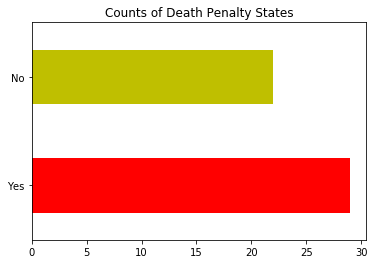

In [18]:
state_death_penalty_barplot['Death_Penalty?'].value_counts().plot(kind='barh', color = ['r', 'y'], title = 'Counts of Death Penalty States')

We will then plot each state on the map of the United States. To do so, it is necessary to convert the names of the states to their abbreviations by using a dictionary found on Google, as the plotly library requires it.

In [19]:
states_dictionary = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AZ': 'Arizona','CA': 'California','CO': 'Colorado','CT': 'Connecticut',
        'DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho',
        'IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana','MA': 'Massachusetts','MD': 'Maryland',
        'ME': 'Maine','MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri','MS': 'Mississippi','MT': 'Montana','NC': 'North Carolina',
        'ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York',
        'OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon','PA': 'Pennsylvania','RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota',
        'TN': 'Tennessee','TX': 'Texas','UT': 'Utah','VA': 'Virginia','VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia',
        'WY': 'Wyoming'}

In [20]:
states_dictionary = {value:key for key, value in states_dictionary.items()}

In [21]:
state_death_penalty_mapplot = state_death_penalty.replace({'State, Territory, or District': states_dictionary})

In [22]:
fig = go.Figure(data=go.Choropleth(
    locations=state_death_penalty_mapplot['State, Territory, or District'],
    z=state_death_penalty_mapplot['Death_Penalty?'],
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="Death Penalty?"
))

States colored in red are the ones which legalize death penalty, and the states not colored are the ones which abolished death penalty.

In [23]:
fig.update_layout(
    title_text = 'Death Penalty Legalization Per State',
    geo_scope='usa', # limite map scope to USA
)

Since we now have a map of the United States, we can try plotting the Religosity by State dataset, and as well as the Educational Attainment by State dataset, onto the USA map in hopes of finding any direct correlation by visualizing.

In [24]:
def convert_percentage(x):
    if x.strip('%').isnumeric():
        x = float(x.strip('%')) / 100
        return x
    else:
        x = np.nan
        return x
state_religiosity_mapplot = state_religiosity.dropna()
state_religiosity_mapplot['Percentage stating that religion is "very important" or "somewhat important"'] = state_religiosity_mapplot['Percentage stating that religion is "very important" or "somewhat important"'].apply(convert_percentage)
state_religiosity_mapplot['Percent Religious, 2014'] = state_religiosity_mapplot['Percent Religious, 2014'].apply(convert_percentage)

In [25]:
state_religiosity_mapplot['State, Territory, or District'] = state_religiosity_mapplot.replace({'State, Territory, or District': states_dictionary})

In [26]:
fig = go.Figure(data=go.Choropleth(
    locations=state_religiosity_mapplot['State, Territory, or District'],
    z=state_religiosity_mapplot['Percentage stating that religion is "very important" or "somewhat important"'],
    locationmode='USA-states',
    colorscale='Greens',
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="Percentage stating that religion is very important or somewhat important"
))

Judging from the graph, it can not be concluded that religiosity is directly correlated with death penalty legalizations of the states, but the fact that all darker colored states retain death penalty may be revealing: 

In [27]:
fig.update_layout(
    title_text = 'Percentage of People Stating Religion is Important Per State',
    geo_scope='usa', # limite map scope to USA
)

In [28]:
def convert_percentage_2(x):
    x = float(x.strip('%')) / 100
    return x
state_education_mapplot = state_education
state_education_mapplot['High school graduate or higher'] = state_education_mapplot['High school graduate or higher'].apply(convert_percentage_2)
state_education_mapplot['Bachelor\'s degree or higher'] = state_education_mapplot['Bachelor\'s degree or higher'].apply(convert_percentage_2)
state_education_mapplot['Advanced degree '] = state_education_mapplot['Advanced degree '].apply(convert_percentage_2)

In [29]:
state_education_mapplot = state_education_mapplot.replace({'State, federal district or territory': states_dictionary})

In [30]:
fig = go.Figure(data=go.Choropleth(
    locations=state_education_mapplot['State, federal district or territory'],
    z=state_education_mapplot['High school graduate or higher'],
    locationmode='USA-states',
    colorscale='Blues',
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="Percentage of high school graduate or higher"
))

Intuitively, the darker colored states located in the northern parts of the country are mostly death-penalty-free (including Alaska and Hawaii); however, exceptions like Montana and Wyoming make it hard to judge:

In [31]:
fig.update_layout(
    title_text = 'Percentage of High School Graduates or Higher Per State',
    geo_scope='usa', # limite map scope to USA
)

The results from the data visualizations are revealing, but they are not enough to provide us a conclusion and an answer to our hypothesis question. Therefore, we will then proceed with other methods in order to find correlations between both religiosity / education and state death penalty.

### Correlation between execution number and religious rate in each state

In order to make sure that the dataset of the number of state execution can be merged with all other datasets, we have to change the state column from abbreviation to full state name. After the renaming process, we can group the death penalty number by individual states to get the total number of capital punishment in each state.

In [32]:
state_execution_number = state_execution_number.replace({'State': dict(zip(states.Abbreviation, states.State))})
execution_count_by_state = state_execution_number.groupby('State').size()
execution_count_by_state = pd.DataFrame(execution_count_by_state).reset_index()
execution_count_by_state.head()

State   0
0     Alabama  58
1     Arizona  37
2    Arkansas  27
3  California  13
4    Colorado   1

After the renaming process, we merge the state religious rate dataframe to the state execution number dataframe. We remove all invalid data through the process. 

In [33]:
state_religiosity = state_religiosity.rename(columns={'State, Territory, or District': 'State'})

religion_execution = state_religiosity.merge(execution_count_by_state, how='outer')
religion_execution = religion_execution.rename(columns={0: 'Number of execution'})
religion_execution = religion_execution[religion_execution['Percentage stating that religion is "very important" or "somewhat important"'] != '?X']
religion_execution = religion_execution[religion_execution['State'] != 'FE']

religion_execution.head()

State  Rank by population  \
0  California                 1.0   
1       Texas                 2.0   
2     Florida                 3.0   
3    New York                 4.0   
4    Illinois                 5.0   

  Percentage stating that religion is "very important" or "somewhat important"  \
0                                                73%                             
1                                                86%                             
2                                                78%                             
3                                                72%                             
4                                                77%                             

   Rank by religiosity (2014) Percent Religious, 2014  Number of execution  
0                        45.0                     73%                 13.0  
1                        13.0                     82%                538.0  
2                        36.0                     76%                 92.0  
3                        43.0                     73%                  NaN  
4                        30.0                     78%                 12.0

We strip off the percentage symbol and convert the percentage to decimal for the future correlation calculation. We also filled in null value with 0.

In [34]:
religion_execution['Percentage stating that religion is "very important" or "somewhat important"'] = religion_execution['Percentage stating that religion is "very important" or "somewhat important"'].str.strip('%').astype(int) / 100
religion_execution['Percent Religious, 2014'] = religion_execution['Percent Religious, 2014'].str.strip('%').astype(int) / 100
religion_execution = religion_execution.fillna(0)

religion_execution.head()

State  Rank by population  \
0  California                 1.0   
1       Texas                 2.0   
2     Florida                 3.0   
3    New York                 4.0   
4    Illinois                 5.0   

   Percentage stating that religion is "very important" or "somewhat important"  \
0                                               0.73                              
1                                               0.86                              
2                                               0.78                              
3                                               0.72                              
4                                               0.77                              

   Rank by religiosity (2014)  Percent Religious, 2014  Number of execution  
0                        45.0                     0.73                 13.0  
1                        13.0                     0.82                538.0  
2                        36.0                     0.76                 92.0  
3                        43.0                     0.73                  0.0  
4                        30.0                     0.78                 12.0

For Exploratory Data visualization, we use the scatter matrix and find out that the data is skewed at 0 since almost half of the states do not have death penalty. We also notice that even though religious states spread through the chart, there is still a tendency that the more religious a state is, the higher the number of execution would be.

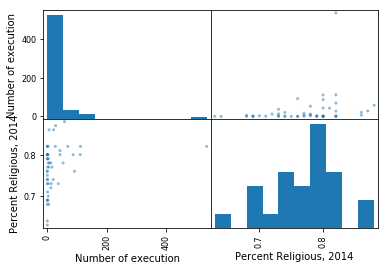

In [35]:
fig1 = pd.plotting.scatter_matrix(religion_execution[['Number of execution', 'Percent Religious, 2014']])

For data analysis, we used correlation calculation to check how related the religious percentage is comparing to the execution number in each state. The result is that the percentage of people considering religion is important in their life is positively correlated with the number of execution in the state. This is the opposite of our hypothesis since we thought the modern church is against capital punishment; however, states like Texas which has a high religious percentage still supports death penalty. With a correlation coefficient of 0.326467, we can say that religious rate is moderately positively correlated with the number of execution per state.

In [36]:
corr = religion_execution.corr()
corr

Rank by population  \
Rank by population                                            1.000000   
Percentage stating that religion is "very impor...           -0.262296   
Rank by religiosity (2014)                                    0.157991   
Percent Religious, 2014                                      -0.191119   
Number of execution                                          -0.353012   

                                                    Percentage stating that religion is "very important" or "somewhat important"  \
Rank by population                                                                          -0.262296                              
Percentage stating that religion is "very impor...                                           1.000000                              
Rank by religiosity (2014)                                                                  -0.860711                              
Percent Religious, 2014                                                                      0.893128                              
Number of execution                                                                          0.326467                              

                                                    Rank by religiosity (2014)  \
Rank by population                                                    0.157991   
Percentage stating that religion is "very impor...                   -0.860711   
Rank by religiosity (2014)                                            1.000000   
Percent Religious, 2014                                              -0.967865   
Number of execution                                                  -0.299279   

                                                    Percent Religious, 2014  \
Rank by population                                                -0.191119   
Percentage stating that religion is "very impor...                 0.893128   
Rank by religiosity (2014)                                        -0.967865   
Percent Religious, 2014                                            1.000000   
Number of execution                                                0.249109   

                                                    Number of execution  
Rank by population                                            -0.353012  
Percentage stating that religion is "very impor...             0.326467  
Rank by religiosity (2014)                                    -0.299279  
Percent Religious, 2014                                        0.249109  
Number of execution                                            1.000000

### Correlation between execution number and educational rate in each state

In order to analyze the correlation bewteen state education rate and state execution number, we first have to merge these two dataframes together based on the state index. During the process, remove all invalid data.

In [37]:
state_education = state_education.rename(columns={'State, federal district or territory': 'State'})

education_execution = state_education.merge(execution_count_by_state, how='outer')
education_execution = education_execution.rename(columns={0: 'Number of execution'})
education_execution = education_execution[education_execution['State'] != 'FE']

education_execution.head()

State  High school graduate or higher  High school rank  \
0        Montana                           0.930               1.0   
1  New Hampshire                           0.928               2.0   
2      Minnesota                           0.928               3.0   
3        Wyoming                           0.928               4.0   
4         Alaska                           0.924               5.0   

   Bachelor's degree or higher  Bachelor's rank  Advanced degree   \
0                        0.307             21.0             0.101   
1                        0.360              9.0             0.138   
2                        0.348             11.0             0.118   
3                        0.267             41.0             0.093   
4                        0.290             28.0             0.104   

   Advanced degree rank  Number of execution  
0                  33.0                  3.0  
1                  10.0                  NaN  
2                  18.0                  NaN  
3                  39.0                  1.0  
4                  29.0                  NaN

After the merge, we fill all null data with 0 as well as converting all percentages to decimals.

In [38]:
education_execution = education_execution.fillna(0)
education_execution["High school graduate or higher"] = education_execution['High school graduate or higher'].astype(str).str.strip('%').astype(float)
education_execution["Bachelor's degree or higher"] = education_execution["Bachelor's degree or higher"].astype(str).str.strip('%').astype(float)
education_execution["Advanced degree "] = education_execution["Advanced degree "].astype(str).str.strip('%').astype(float)

For the Exploratory Data Vizualization, we try to compare the most basic education level which is the high school graduation rate to the state execution rate since most of us learned about the capital punishment during high school classes. We observe that on the right side of the graph, where the high school graduation rate is really high, there is no high execution number at all. This means that when the high school educational rate is over a certain threshold, the state execution number will drop drastically.

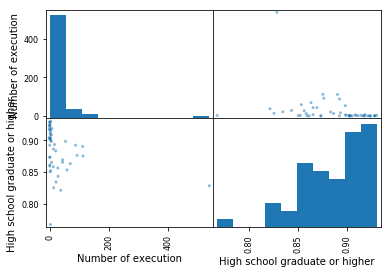

In [39]:
fig2 = pd.plotting.scatter_matrix(education_execution[['Number of execution', 'High school graduate or higher']])

For data analysis, we use linear corrrelation to determine if certain level of educational rate would affect the state's legalization of death penalty. The result actually aligns with our hypothesis since we have a moderately negatively correlated relation between the graduation rate from high school and the state execution number with a correlation coefficient of -0.307562. In other words, the more the state is educated beyond the level of high school, the more likely the state to object capital punishment. The potential reasoning is that the more people are educated, the more they would realize that capital punishment is not the ultimate way to solve the root of crimes which could be poverty, lack of resources and etc.

In [40]:
corr = education_execution[['High school graduate or higher', "Bachelor's degree or higher", "Advanced degree ", "Number of execution"]].corr()
corr

High school graduate or higher  \
High school graduate or higher                        1.000000   
Bachelor's degree or higher                           0.326999   
Advanced degree                                       0.163862   
Number of execution                                  -0.307562   

                                Bachelor's degree or higher  Advanced degree   \
High school graduate or higher                     0.326999          0.163862   
Bachelor's degree or higher                        1.000000          0.932006   
Advanced degree                                    0.932006          1.000000   
Number of execution                               -0.119729         -0.114468   

                                Number of execution  
High school graduate or higher            -0.307562  
Bachelor's degree or higher               -0.119729  
Advanced degree                           -0.114468  
Number of execution                        1.000000

### Crime Rate and Types EDA

In [41]:
df = merged_crime.drop(["Unnamed: 14", "Revised rape /2", "Revised rape rate /2"], axis=1)
df = df[df.index >= 1965]
df.head()

Population  Violent crime total  Murder and nonnegligent Manslaughter  \
Year                                                                          
1965     3462000                 6916                                   395   
1966     3517000                 8098                                   384   
1967     3540000                 8448                                   415   
1968     3566000                 8288                                   421   
1969     3531000                 8842                                   485   

      Legacy rape /1  Robbery  Aggravated assault  Violent Crime rate  \
Year                                                                    
1965             367      992                5162               199.8   
1966             341     1124                6249               230.3   
1967             371     1167                6495               238.6   
1968             396     1462                6009               232.4   
1969             494     1448                6415               250.4   

      Murder and nonnegligent manslaughter rate  Legacy rape rate /1  \
Year                                                                   
1965                                       11.4                 10.6   
1966                                       10.9                  9.7   
1967                                       11.7                 10.5   
1968                                       11.8                 11.1   
1969                                       13.7                 14.0   

      Robbery rate  Aggravated assault rate state  
Year                                               
1965          28.7                    149.1    AL  
1966          32.0                    177.7    AL  
1967          33.0                    183.5    AL  
1968          41.0                    168.5    AL  
1969          41.0                    181.7    AL

In [42]:
df.describe()

Population  Violent crime total  \
count  2.500000e+03          2500.000000   
mean   5.036679e+06         25521.265200   
std    5.553369e+06         39251.136702   
min    2.530000e+05            80.000000   
25%    1.317657e+06          3858.000000   
50%    3.438801e+06         12695.000000   
75%    5.905901e+06         29692.750000   
max    3.880250e+07        345624.000000   

       Murder and nonnegligent Manslaughter  Legacy rape /1        Robbery  \
count                           2500.000000     2500.000000    2500.000000   
mean                             363.063200     1562.724800    8931.142800   
std                              493.131184     1959.673831   15930.207331   
min                                1.000000        6.000000       8.000000   
25%                               53.000000      362.000000     986.000000   
50%                              191.000000      965.000000    3596.500000   
75%                              464.250000     1808.500000    8845.750000   
max                             4096.000000    13693.000000  130897.000000   

       Aggravated assault  Violent Crime rate  \
count         2500.000000         2500.000000   
mean         14638.702800          428.570000   
std          22146.946838          298.049515   
min             30.000000           19.800000   
25%           2547.500000          241.200000   
50%           7418.500000          370.100000   
75%          17811.500000          551.025000   
max         198045.000000         2921.800000   

       Murder and nonnegligent manslaughter rate  Legacy rape rate /1  \
count                                2500.000000          2500.000000   
mean                                    6.821080            30.473400   
std                                     6.331574            14.960511   
min                                     0.200000             0.800000   
25%                                     3.200000            20.300000   
50%                                     5.600000            28.500000   
75%                                     8.900000            39.125000   
max                                    80.600000           102.200000   

       Robbery rate  Aggravated assault rate  
count   2500.000000              2500.000000  
mean     137.678000               253.141280  
std      153.516209               162.094879  
min        1.900000                 7.400000  
25%       56.675000               140.350000  
50%      105.400000               218.550000  
75%      164.100000               337.525000  
max     1635.100000              1557.600000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001924D552898>,
      dtype=object)

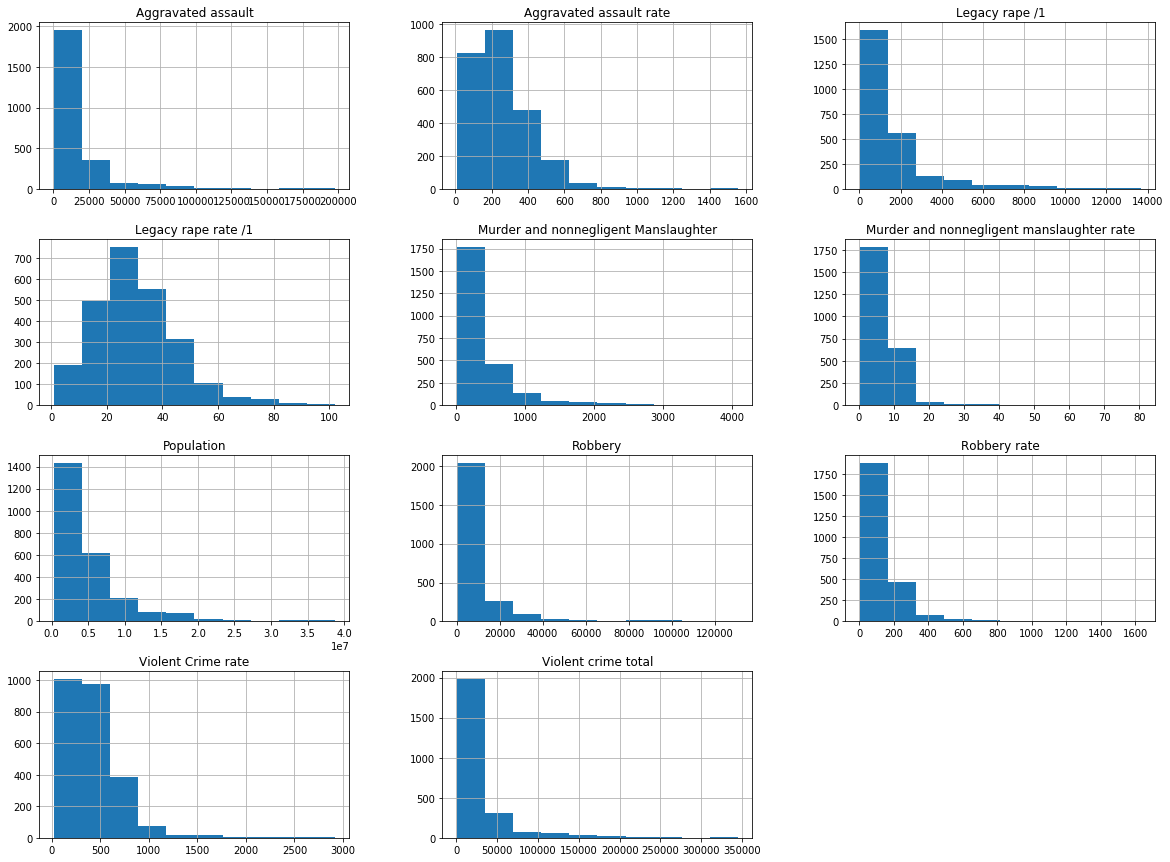

In [43]:
df.hist(figsize=(20,15))

The data seems to be skewed toward the left as values hug 0 but can't possibly be less than it. We transform the data logarithmically to spread out the data. This yields a normal seeming distribution.

state  Violent crime total  Murder and nonnegligent Manslaughter  \
Year                                                                    
1965    AL             3.839855                              2.596597   
1966    AL             3.908378                              2.584331   
1967    AL             3.926754                              2.618048   
1968    AL             3.918450                              2.624282   
1969    AL             3.946551                              2.685742   

      Legacy rape /1   Robbery  Aggravated assault  Violent Crime rate  \
Year                                                                     
1965        2.564666  2.996512            3.712818            2.300595   
1966        2.532754  3.050766            3.795811            2.362294   
1967        2.569374  3.067071            3.812579            2.377670   
1968        2.597695  3.164947            3.778802            2.366236   
1969        2.693727  3.160769            3.807197            2.398634   

      Murder and nonnegligent manslaughter rate  Legacy rape rate /1  \
Year                                                                   
1965                                   1.056905             1.025306   
1966                                   1.037426             0.986772   
1967                                   1.068186             1.021189   
1968                                   1.071882             1.045323   
1969                                   1.136721             1.146128   

      Robbery rate  Aggravated assault rate  
Year                                         
1965      1.457882                 2.173478  
1966      1.505150                 2.249687  
1967      1.518514                 2.263636  
1968      1.612784                 2.226600  
1969      1.612784                 2.259355

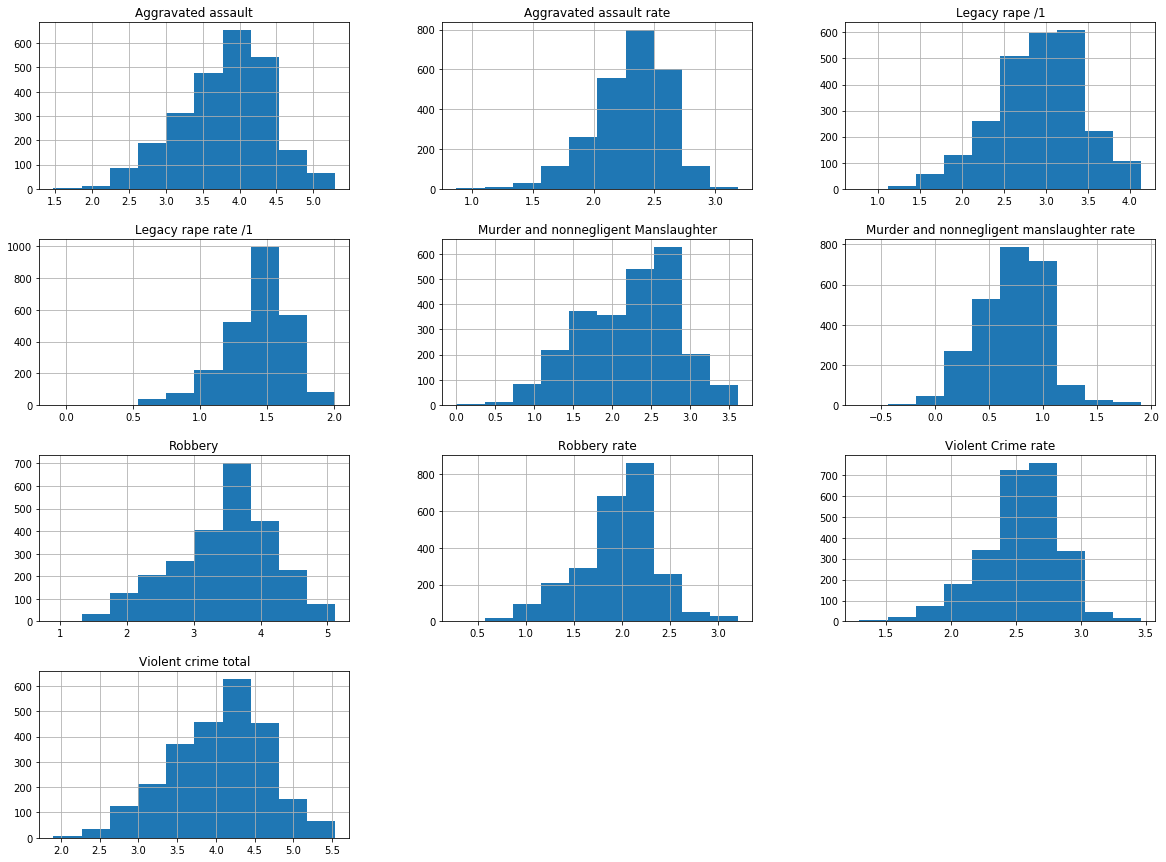

In [44]:
df_log = pd.DataFrame(df.iloc[:,11], index=df.index)
for col in df.columns[1:11]:
    df_log[col] = np.log10(df[col])

df_log.hist(figsize=(20,15))
df_log.head()

### Crime Trends over History

In [45]:
counts = df[['Population', 'Violent crime total', 'Murder and nonnegligent Manslaughter',
             'Legacy rape /1', 'Robbery', 'Aggravated assault', 'state']]
counts.head()

Population  Violent crime total  Murder and nonnegligent Manslaughter  \
Year                                                                          
1965     3462000                 6916                                   395   
1966     3517000                 8098                                   384   
1967     3540000                 8448                                   415   
1968     3566000                 8288                                   421   
1969     3531000                 8842                                   485   

      Legacy rape /1  Robbery  Aggravated assault state  
Year                                                     
1965             367      992                5162    AL  
1966             341     1124                6249    AL  
1967             371     1167                6495    AL  
1968             396     1462                6009    AL  
1969             494     1448                6415    AL

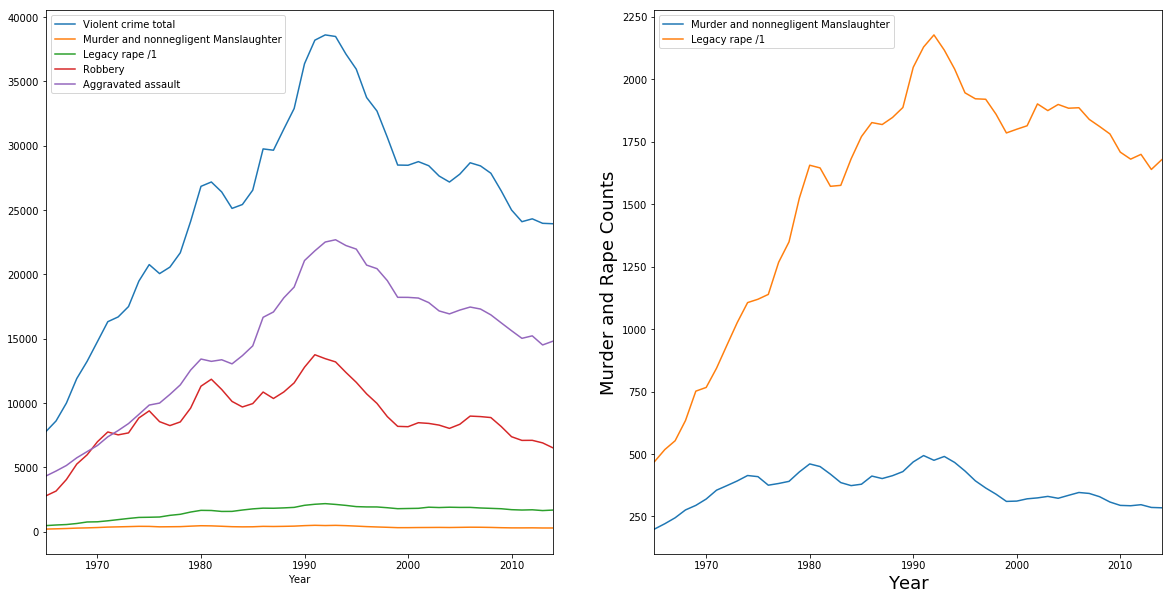

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
plt.xlabel('Decade',fontsize=18)
plt.ylabel('Crime type counts overall', fontsize=18)
counts[['Violent crime total', 'Murder and nonnegligent Manslaughter', 'Legacy rape /1', 
        'Robbery', 'Aggravated assault']].groupby(df.index).agg('mean').plot(ax=ax1)
plt.xlabel('Decade',fontsize=18)
plt.ylabel('Murder and Rape Counts', fontsize=18)
counts[['Murder and nonnegligent Manslaughter', 
        'Legacy rape /1']].groupby(df.index).agg('mean').plot(ax=ax2)
# TODO match second plot colors

According to the counts there was a spike in crime in the 1990s, which largely declined moving towards present. This spike seems to come mostly from robbery and assault however upon closer inspection Murder and Rape experience the same spikes

In [47]:
counts_corr = counts.corr()
counts_corr

Population  Violent crime total  \
Population                              1.000000             0.902192   
Violent crime total                     0.902192             1.000000   
Murder and nonnegligent Manslaughter    0.877658             0.935073   
Legacy rape /1                          0.901365             0.919314   
Robbery                                 0.849081             0.957822   
Aggravated assault                      0.887256             0.980398   

                                      Murder and nonnegligent Manslaughter  \
Population                                                        0.877658   
Violent crime total                                               0.935073   
Murder and nonnegligent Manslaughter                              1.000000   
Legacy rape /1                                                    0.892721   
Robbery                                                           0.916871   
Aggravated assault                                                0.895920   

                                      Legacy rape /1   Robbery  \
Population                                  0.901365  0.849081   
Violent crime total                         0.919314  0.957822   
Murder and nonnegligent Manslaughter        0.892721  0.916871   
Legacy rape /1                              1.000000  0.835930   
Robbery                                     0.835930  1.000000   
Aggravated assault                          0.918588  0.883426   

                                      Aggravated assault  
Population                                      0.887256  
Violent crime total                             0.980398  
Murder and nonnegligent Manslaughter            0.895920  
Legacy rape /1                                  0.918588  
Robbery                                         0.883426  
Aggravated assault                              1.000000

The correlation is fairly strong between the counts for all states and over the years, as we see the lowest value in correlation is between rape and robbery. There hasn't been a distinct increase in a certain crime type specifically, and trends in crime are generally related. 

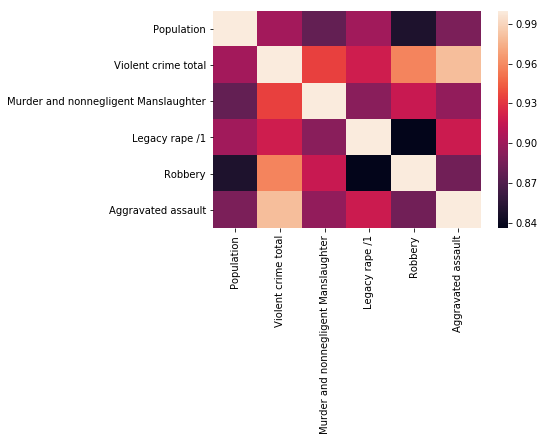

In [48]:
sns.heatmap(counts_corr)

In [49]:
percents = pd.DataFrame(data=counts)
percents['% Murder'] = counts['Murder and nonnegligent Manslaughter'] / counts['Violent crime total']
percents['% Rape'] = counts['Legacy rape /1'] / counts['Violent crime total']
percents['% Robbery'] = counts['Robbery'] / counts['Violent crime total']
percents['% Aggravated assault'] = counts['Aggravated assault'] / counts['Violent crime total']
percents.head()

Population  Violent crime total  Murder and nonnegligent Manslaughter  \
Year                                                                          
1965     3462000                 6916                                   395   
1966     3517000                 8098                                   384   
1967     3540000                 8448                                   415   
1968     3566000                 8288                                   421   
1969     3531000                 8842                                   485   

      Legacy rape /1  Robbery  Aggravated assault state  % Murder    % Rape  \
Year                                                                          
1965             367      992                5162    AL  0.057114  0.053065   
1966             341     1124                6249    AL  0.047419  0.042109   
1967             371     1167                6495    AL  0.049124  0.043916   
1968             396     1462                6009    AL  0.050796  0.047780   
1969             494     1448                6415    AL  0.054852  0.055870   

      % Robbery  % Aggravated assault  
Year                                   
1965   0.143436              0.746385  
1966   0.138800              0.771672  
1967   0.138139              0.768821  
1968   0.176400              0.725024  
1969   0.163764              0.725515

In [50]:
percents_by_state = percents.groupby(df.index).agg('mean')[['% Murder', '% Rape', '% Robbery', '% Aggravated assault']]
percents_by_state.head()

% Murder    % Rape  % Robbery  % Aggravated assault
Year                                                     
1965  0.034244  0.077038   0.288162              0.600555
1966  0.035665  0.080462   0.295138              0.588735
1967  0.034356  0.072059   0.315289              0.578296
1968  0.031780  0.072153   0.342867              0.553200
1969  0.028306  0.074010   0.349345              0.548338

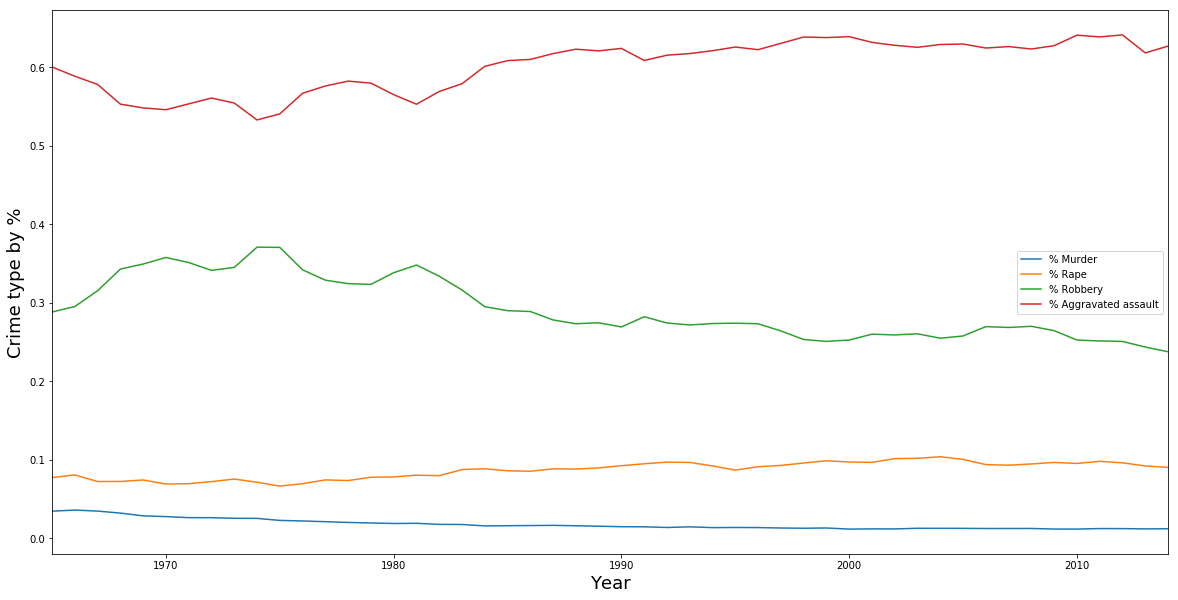

In [51]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xlabel('Decade',fontsize=18)
plt.ylabel('Crime type by %', fontsize=18)
percents_by_state.plot(ax=ax)

The crime types have not changed much in relationship to eachother over time
### Crimes that Warrant the Death Penalty

In [52]:
execs = pd.read_csv('states_death_penalty_number.csv')
execs.head()

Date             Name  Age   Sex   Race   Crime  Victim Count  \
0  01/17/1977     Gary Gilmore   36  Male  White  Murder             1   
1  05/25/1979  John Spenkelink   30  Male  White  Murder             1   
2  10/22/1979     Jesse Bishop   46  Male  White  Murder             1   
3  03/09/1981      Steven Judy   24  Male  White  Murder             4   
4  08/10/1982    Frank Coppola   38  Male  White  Murder             1   

         Victim Sex Victim Race             County State   Region  \
0              Male       White               Utah    UT     West   
1              Male       White               Leon    FL    South   
2              Male       White              Clark    NV     West   
3  2 Male, 2 Female       White             Marion    IN  Midwest   
4              Male       White  Newport News City    VA    South   

          Method Juvenile Volunteer Federal Foreign National  
0   Firing Squad       No       Yes      No               No  
1  Electrocution       No        No      No               No  
2    Gas Chamber       No       Yes      No               No  
3  Electrocution       No       Yes      No               No  
4  Electrocution       No       Yes      No               No

In [53]:
execs['Crime'].unique()

array(['Murder'], dtype=object)

Only murder cases receive the death penalty. Therefore we will only look at murder when comparing the death penalty to crime

### Abolishment by State

In [54]:
dp_dict = pd.read_csv('state_death_penalty_clean.csv')
dp_dict.drop([dp_dict.columns[0]], axis=1, inplace=True)
dp_dict.dropna(inplace=True)
dp_dict.rename({dp_dict.columns[0]: 'State'}, axis=1, inplace=True)
dp_dict['Death_Penalty?'] = dp_dict['Death_Penalty?'].apply(lambda x: int(x))
dp_dict['YearAbolished/GM'] = dp_dict['YearAbolished/GM'].apply(lambda x: int(x))
dp_dict.head()

State  Death_Penalty?  Gubernatoral_Moratoria  YearAbolished/GM
0  California               1                       1              2019
1       Texas               1                       0                -1
2     Florida               1                       0                -1
3    New York               0                       0              2007
4    Illinois               0                       0              2011

First we read in the death penalty abolishment dataset. Then we convert the data to the correct type and merge it with the state to state code dictionary. This will prove useful for merging with the crime dataset as well as plotting below.

In [55]:
dp_dict = dp_dict.merge(states, left_on='State', right_on='State')
dp_dict.head()

State  Death_Penalty?  Gubernatoral_Moratoria  YearAbolished/GM  \
0  California               1                       1              2019   
1       Texas               1                       0                -1   
2     Florida               1                       0                -1   
3    New York               0                       0              2007   
4    Illinois               0                       0              2011   

  Abbreviation  
0           CA  
1           TX  
2           FL  
3           NY  
4           IL

We plot the year of death penalty abolishment for each state. Year is represented by color where darker color indicates later year, while states which still have the death penalty are denoted as white.

In [56]:
plotly.offline.init_notebook_mode(connected=True)

fig = go.Figure(data=go.Choropleth(
    locations=dp_dict['Abbreviation'], # Spatial coordinates
    z = dp_dict['YearAbolished/GM'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Greens',
    colorbar_title = "Year Abolished",
))

fig.update_layout(
    title_text = 'Year of Death Penalty Abolishment by State',
    geo_scope='usa', # limite map scope to USA
)

data = fig
fig.show()

## Death Penalty vs Crime Data Analysis

Now we test the similarity between crime rates before and after death penalty has been abolished to see if we can reject the null hypothesis. To do this we start by cleaning our abolishment dictionary and grabbing our log-transformed crime data.

In [57]:
dp_dict_lean = dp_dict[dp_dict.columns[-2:]]
dp_dict_lean.head()

YearAbolished/GM Abbreviation
0              2019           CA
1                -1           TX
2                -1           FL
3              2007           NY
4              2011           IL

In [58]:
df_log.head()

state  Violent crime total  Murder and nonnegligent Manslaughter  \
Year                                                                    
1965    AL             3.839855                              2.596597   
1966    AL             3.908378                              2.584331   
1967    AL             3.926754                              2.618048   
1968    AL             3.918450                              2.624282   
1969    AL             3.946551                              2.685742   

      Legacy rape /1   Robbery  Aggravated assault  Violent Crime rate  \
Year                                                                     
1965        2.564666  2.996512            3.712818            2.300595   
1966        2.532754  3.050766            3.795811            2.362294   
1967        2.569374  3.067071            3.812579            2.377670   
1968        2.597695  3.164947            3.778802            2.366236   
1969        2.693727  3.160769            3.807197            2.398634   

      Murder and nonnegligent manslaughter rate  Legacy rape rate /1  \
Year                                                                   
1965                                   1.056905             1.025306   
1966                                   1.037426             0.986772   
1967                                   1.068186             1.021189   
1968                                   1.071882             1.045323   
1969                                   1.136721             1.146128   

      Robbery rate  Aggravated assault rate  
Year                                         
1965      1.457882                 2.173478  
1966      1.505150                 2.249687  
1967      1.518514                 2.263636  
1968      1.612784                 2.226600  
1969      1.612784                 2.259355

In order to see if crime data and the death penalty are related, we use a modify form of a pairwise t-test to compare the difference in crime rates before and after abolishment of the death penalty. For our test population we draw samples for each state which abolished the death penalty, taking the mean of the crime rates for the 10 years before and after the death penalty, or the mean of wahtever data exists if data past 10 years of abolishment does not exist.

To do this we devise a function which takes:
- state abbreviation
- number of years (default is 10)

and returns a series with state abbreviation, before, then after abolishment mean crime rate

In [59]:
df_log = df_log[['state', 'Murder and nonnegligent Manslaughter']]

def state_sample(state, numyears=10):
    state_df = df_log[df_log['state'] == state]
    year = dp_dict_lean[dp_dict_lean['Abbreviation'] == state].iloc[0, 0]
    
    if (year - numyears) < state_df.index[0]:
        before_ix = state_df.index[0]
    else:
        before_ix = year - numyears
        
    before = state_df[(before_ix <= state_df.index) & (state_df.index < year)]
    before_val = np.mean(before[before.columns[1]])
    
    if (year + numyears) > state_df.index[-1]:
        after_ix = state_df.index[-1]
    else:
        after_ix = year + numyears
        
    after = state_df[(after_ix >= state_df.index) & (state_df.index > year)]
    after_val = np.mean(after[after.columns[1]])
    return [state, before_val, after_val]

Then we iterate through the states in the dictionary, removing them if the state has not abolished the death penalty or its date of abolishment is outside of the range of or crime data. If these conditions are not true we calculate crime rate before and after death penalty is abolished and add to a list.

In [60]:
sample_rows = []
for row in dp_dict_lean.iterrows():
    row_info = row[1]
    
    year = row_info[0]
    
    if year != -1 and (1965 < year and year < 2014):
        sample_row = state_sample(row_info[1])
        sample_rows.append(sample_row)
        
sample_rows

[['NY', 2.9704942939017664, 2.8675564444812607],
 ['IL', 2.9106934926267374, 2.860239498078182],
 ['NJ', 2.5467208007530115, 2.5665963645543846],
 ['MA', 2.3326714107989237, 2.3394346947539333],
 ['MD', 2.6798029434229425, 2.5622928644564746],
 ['CO', 2.2133387762463412, 2.1789769472931693],
 ['OR', 1.9163022613869969, 1.9271134211944867],
 ['CT', 2.0564806766178783, 1.9467699217823307],
 ['NM', 2.158535042247853, 2.100693919416324],
 ['RI', 1.5107035782807583, 1.5932188868447161],
 ['ND', 0.6232164706436344, 0.9212975546652139],
 ['DC', 2.4162097583681224, 2.48522924499239],
 ['VT', 0.8218616033415106, 1.0976406005339239]]

Merge all the lists to form a DataFrame for our t-test

In [61]:
sample_df = pd.DataFrame(sample_rows, columns=['state', 'before', 'after'])
sample_df

state    before     after
0     NY  2.970494  2.867556
1     IL  2.910693  2.860239
2     NJ  2.546721  2.566596
3     MA  2.332671  2.339435
4     MD  2.679803  2.562293
5     CO  2.213339  2.178977
6     OR  1.916302  1.927113
7     CT  2.056481  1.946770
8     NM  2.158535  2.100694
9     RI  1.510704  1.593219
10    ND  0.623216  0.921298
11    DC  2.416210  2.485229
12    VT  0.821862  1.097641

Finally, run the pairwise t-test on the data.

In [62]:
stats.ttest_rel(sample_df['before'], sample_df['after'])

Ttest_relResult(statistic=-0.6022454565115312, pvalue=0.5582192674532902)

The p-value 0.55 is extraordinarily high compared to the standard 0.05 cutoff, indicating that we fail to reject the null hypothesis that murder crime rates and the death penalty are unrelated.

# Ethics & Privacy

Due to the public access and ease at which death penalty records exist online, it was relatively simple and easy for us to find statistics pertaining to general questions (the number of executions, sentencings, state population, education levels, religious participation, etc.). Although the information posted online includes the names, ethnicity, and more personal background of each convicted criminal, we decided to exclude this information as it was not necessary to mention and also with risks upon the infringement of those sentenced. 
    
While we as a group attempted to simply utilize raw data and information regarding the death penalty, we also realized that no data is completely faultless of biases. Much of the data we collected encompassed societal biases, including, but not limited to: variations of racial prejudice and discrimination within each state, differences in each state’s legal system and criminal law procedures, religious affiliation, education, and other socio-cultural impacts. A few unintended consequences of this project could potentially result in readers/graders believing that factor(s) we explored are immediate reasons to believe that the death penalty stance in each state encompasses the vast majority of the citizens who make up that state. In other words, we do not intend for a reader to believe that if a state has a certain percentage of college graduates living in it, that the simple fact alone will eliminate or dissuade the public from being in favor of the death penalty. Our project aims at simply acknowledging that there may be sufficient correlations among states that may lead us to assume that factors such as those listed, are of importance when considering the implementation of the death penalty. 



# Conclusion & Discussion

In conclusion, we found that higher rates of a state’s population that was more educated correlated to a lesser amount of death penalties resulting in that state. Also, we found that the correlation between a state’s religious, bible-following populace and their support for the death penalty to be implemented was positive. Finally, we did not find a positive correlation between the punishment and crime deterrence of murder rates; states with high support of punishment were also those with higher rates of murders/high level crime.

These findings obviously are based on data that we as a group found interesting to explore correlations between them and capital punishment. Understanding surrounding social and cultural factors may allow for us to determine what hidden factors have a greater impact on a state’s support or opposition of the penalty. 

Regarding the limitation of our dataset, our dataset does not necessarily cover each other's span of period of time because of the limited available data online. It might take some time for people's opinion on capital punishment to take effect on the state's policy on death penalty since the legislation needs time to change the law and make it effective.


# Team Contributions

Esmeralda Naranjo:
Data collection, paragraph coordination and organization, interpretation of code/data into concise questions and results as listed in paragraph sections, Legal jargon translation and Ethics/Privacy organizer. 

Joe Lepe: Data visualizations of death penalty over years, number of death penalty’s per state, the amount of each execution type used and the types used over years and group organization

Ka Ming Chan: Data collection, EDA, Data modeling, Data visualization (all on the aspect of the cause of a state to legalize death penalty)

Luke Nguyen: Data collection, EDA, Data modeling, Data visualization (on the aspect of the effectiveness of capital punishment)

Zixi Sun: Data collection, EDA, Data modeling, Data visualization (all on the aspect of the cause of a state to legalize death penalty)
